<a href="https://colab.research.google.com/github/rahulalshi6-max/DALAB1-EDA/blob/main/Exploring_Datasets_Yourself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Datasets with Python

In this short demo we will analyse a given dataset from 1978, which contains information about politicians having affairs. 

To analyse it, we will use a [Jupyter Notebook](http://jupyter.org/), which is basically a *REPL++* for Python. Entering a command with shift executes the line and prints the result.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

To work with common files like CSV, JSON, Excel files etc., we will use [Pandas](http://pandas.pydata.org/), _an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language_™. Let's import it!

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Our dataset is given as a CSV file. Pandas provides an easy way to read our file with `read_csv`. The path of the file to read is relative to our notebook file. The path can also be an URL, supporting HTTP, FTP and also S3 if your data is stored inside an AWS S3 Bucket!

In [4]:
data = pd.read_csv('/content/sample_data/california_housing_test.csv')

The first thing we will check is the size of our dataset. We can use `info()` to get the number of entries of each column.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


Now we know how many data is inside our file. Pandas is smart enough to parse the column titles by itself and estimate the data types of each column.

You may be curious how the data looks like. Let's see by using `head()`, which will print the first 5 rows.

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


We can access a column of our dataset by using bracket notation and the name of the column.

In [32]:
data['population']

0       1537.0
1        809.0
2       1484.0
3         49.0
4        850.0
         ...  
2995    1258.0
2996    3496.0
2997     693.0
2998      46.0
2999     753.0
Name: population, Length: 3000, dtype: float64

For categorical features like `sex`, you can also get the distributions of each value by using `value_counts()`.

In [7]:
data.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value
-124.18    40.79     40.0                1398.0       311.0           788.0       279.0       1.4668         64600.0               1
-118.20    33.98     43.0                1091.0       320.0           1418.0      316.0       2.1522         159400.0              1
           33.78     48.0                1766.0       497.0           1908.0      466.0       1.9872         168800.0              1
           33.80     45.0                2456.0       495.0           1300.0      450.0       3.9792         210200.0              1
           33.82     34.0                2807.0       768.0           2217.0      744.0       2.4286         204800.0              1
                                                                                                                                  ..
-121.14    37.48     6.0                 1772.0       332.0           1011

But what about numerical values? It definitly makes no sense to count each distinct value. Therefore, we can use `describe()`.

In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


You can also access values like `mean` or `max` directly with the corrsponding methods. Let's see who is the oldest cheater!

This works for the whole dataframe as well. Pandas knows which values are numerical based on the datatype and hides the categorical features for you.

In [37]:
data.nunique()

longitude              607
latitude               587
housing_median_age      52
total_rooms           2215
total_bedrooms        1055
population            1802
households            1026
median_income         2578
median_house_value    1784
dtype: int64

There is also an easy way to filter your dataset. Let's say we want to have a subset of our data containing only woman. This is also possible with the bracket notation!

In [35]:
student = data.drop(['households'],axis=1)

The above statement returns a new dataframe (not a copy, modifying this data will modify the original as well), which can be accessed like before. Let's see how the numerical distribution is for our females.

In [36]:
student.head

<bound method NDFrame.head of       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.05     37.37                27.0       3885.0           661.0   
1       -118.30     34.26                43.0       1510.0           310.0   
2       -117.81     33.78                27.0       3589.0           507.0   
3       -118.36     33.82                28.0         67.0            15.0   
4       -119.67     36.33                19.0       1241.0           244.0   
...         ...       ...                 ...          ...             ...   
2995    -119.86     34.42                23.0       1450.0           642.0   
2996    -118.14     34.06                27.0       5257.0          1082.0   
2997    -119.70     36.30                10.0        956.0           201.0   
2998    -117.12     34.10                40.0         96.0            14.0   
2999    -119.63     34.42                42.0       1765.0           263.0   

      population  median_income  

We can also create new rows. Specify the new column name in brackets and provide a function to set the data. We will create a new column containing True or False, wheather or not the person is below 30.

We can use this to normalize our columns with better values. Take for example `religious`. The number have the following meaning: 1 = not, 2 = mildly, 3 = fairly, 4 = strongly. We can easily replace them inline with the following code.

In [ ]:
rel_meanings = ['not', 'mildly', 'fairly', 'strongly']

This should be enought about Pandas. Let's get some visualisations!

## Visualize Data

To visualize our data, we will use [Seaborn](https://seaborn.pydata.org), a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. Let's import it.

In [9]:
import seaborn as sns

To see our charts directly in our notebook, we have to execute the following:

In [12]:
%matplotlib inline
sns.set()
sns.set_context('talk')

Seaborn together with Pandas makes it pretty easy to create charts to analyze our data. We can pass our Dataframes and Series directly into Seaborn methods. We will see how in the following sections.

### Univariate Plotting

Let's start by visualizing the distribution of the age our our people. We can achieve this with a simple method called `distplot` by passing our series of ages as argument.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


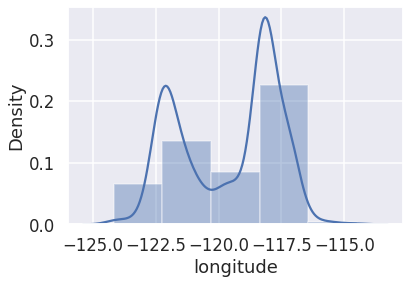

In [13]:
sns.distplot(data['longitude'],bins=5)

The chart above calculates a kernel density as well. To get a real histogram, we have to disable the `kde` feature. We can also increase to number of buckets for our histogram by setting `bins` to 50.

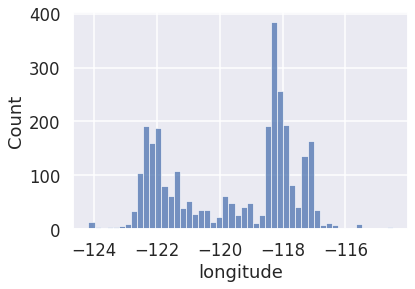

In [15]:
sns.histplot(data['longitude'],bins=50)

Interesting! The ages of the people in this dataset seem to end with two or seven.

We can do the same for every numerical column, e.g. the years of marriage.

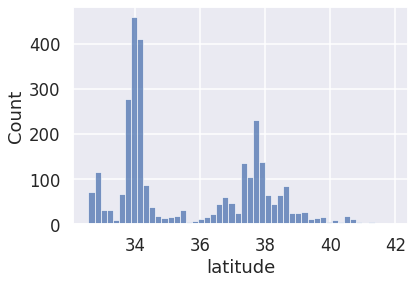

In [16]:
sns.histplot(data['latitude'],bins=50)

The average age of our people is around 32, but the most people are married for more than 14 years!

### Bivariate Plotting

Numbers get even more interesting when we can compare them to other numbers! Lets start comparing the number of years married vs the number of affairs. Seaborn provides us with a method called `jointplot` for this use case.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


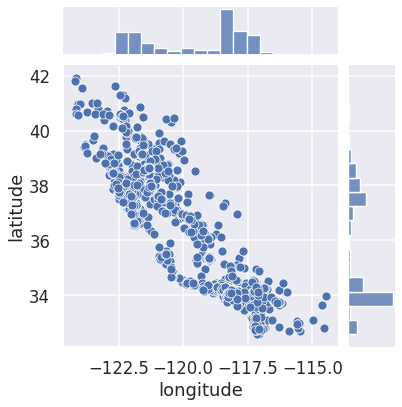

In [21]:
sns.jointplot(data['longitude'],data['latitude'])

To get a better feeling of how the number of affairs is affected by the number of years married, we can use a regression model by specifying `kind` as `reg`.

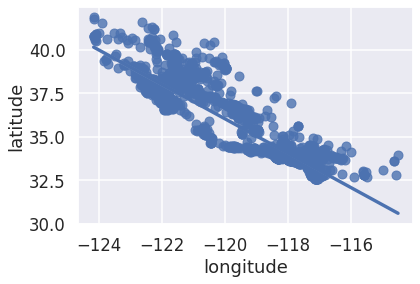

In [22]:
sns.regplot(x='longitude',y='latitude',data=data)

We can also use a kernel to kompare the density of two columns against each other, e.g. `age` and `ym`.

We can get an even better comparison by plotting everything vs everything! Seaborn provides this with the `pairplot` method.

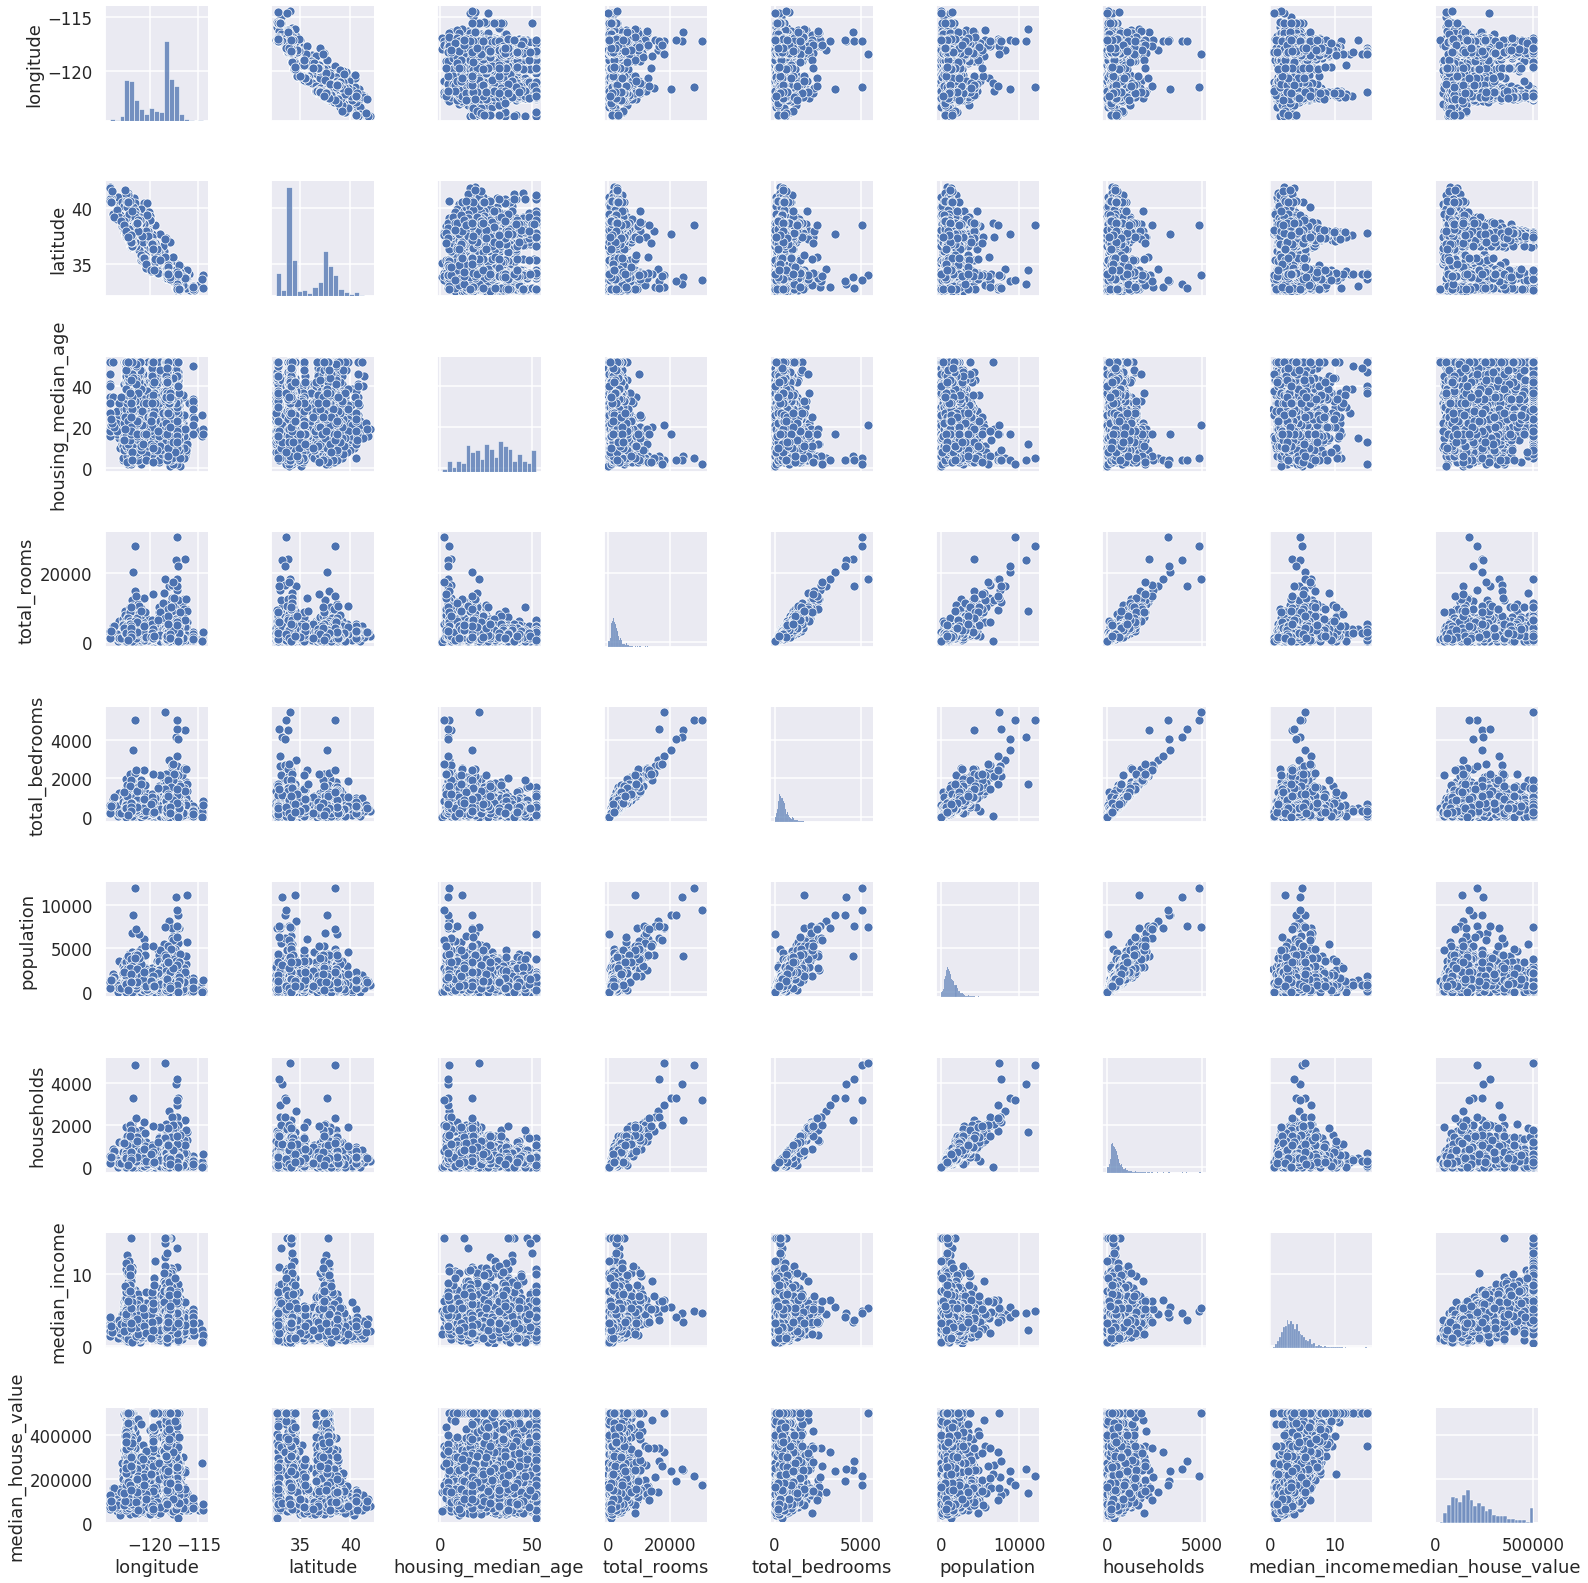

In [23]:
correlation=data.corr()
sns.pairplot(data)

You won't see any special in this data. We need to separate them by some kind of criteria. We can use our categorical values to do this! Seaborn uses a parameter called `hue` to do this. Let's separate our data by `sex` first. To make things even more interesting, let's create a regression for every plot, too!

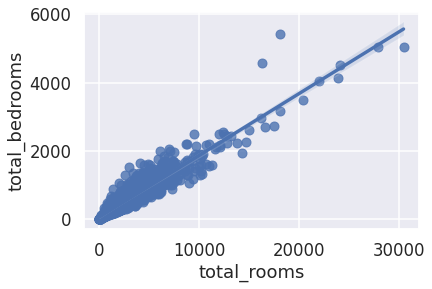

In [24]:
sns.regplot(x='total_rooms',y='total_bedrooms',data=data)

To get even better separation, we can use `lmplot` to compare just the fields we need.

Let's say we're interested in the number of affairs vs years married. We also whant to separate them by `sex`, `child` and `religious`. We will use `sns.lmplot(x="ym", y="nbaffairs", hue="sex", col="child", row="religious", data=affairs)` to achieve this.

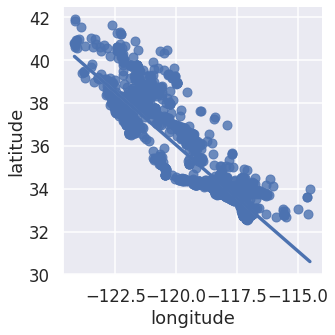

In [31]:
sns.lmplot(x="longitude", y="latitude",data=data)

Here are some categorical plots to explore the dataset even further.

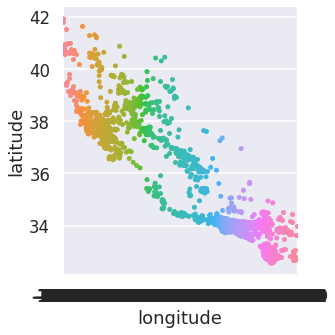

In [27]:
sns.catplot(x='longitude',y='latitude',data=data)


We can also get the correlations between the values by using Pandas builtin method `corr()`.

In [28]:
correlation=data.corr()

Feed these stats into Seaborns `heatmap` method will provide us with the visual representation.

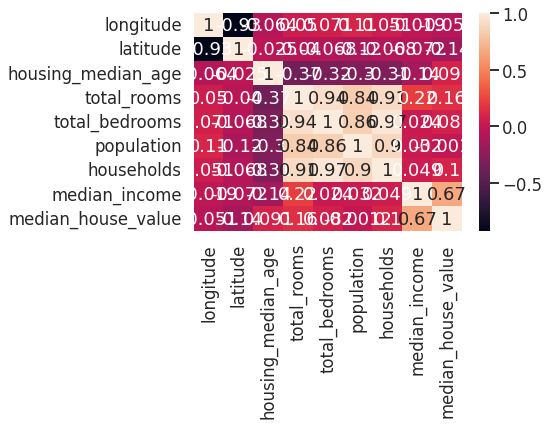

In [29]:
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
